<a href="https://colab.research.google.com/github/tshanmukh/sentiment_analysis/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sentiment analysis project

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
root_path = '/content/gdrive/My Drive/sentiment_analysis/'

## Preprocess and prepare a vocabulary

In [0]:
# Imports 
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import plotly.offline as pyo
from string import punctuation


In [168]:
# Reading the data to a csv
# Reading the data from csv
train_csv = pd.read_csv(root_path+'dataset/train.csv')
print(len(train_csv.text))

5279


In [169]:
punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
reviews = ' '.join(list(train_csv.text))


## Creating a complete text in train csv to words

In [171]:
import string

reviews = reviews.lower() # lowercase, standardize
all_text = ''.join([c for c in reviews if c not in punctuation])

# split by new lines and spaces
reviews_split = all_text.split('\n')
all_text = ' '.join(reviews_split)

# create a list of words
words = all_text.split()
words[30:60]

['taking',
 'tysabri',
 'and',
 'feel',
 'amazing',
 'no',
 'symptoms',
 'other',
 'than',
 'dodgy',
 'color',
 'vision',
 'but',
 'i’ve',
 'had',
 'it',
 'since',
 'always',
 'so',
 'don’t',
 'know',
 'and',
 'i',
 'don’t',
 'know',
 'if',
 'it',
 'will',
 'last',
 'a']

## Removing the punctuation, hyphen, and dash

In [172]:
# imports for nltk stop words
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table).replace('’','').replace('–','') for w in words]
print(stripped[:100])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['autoimmune', 'diseases', 'tend', 'to', 'come', 'in', 'clusters', 'as', 'for', 'gilenya', '', 'if', 'you', 'feel', 'good', 'dont', 'think', 'about', 'it', 'it', 'wont', 'change', 'anything', 'but', 'waste', 'your', 'time', 'and', 'energy', 'im', 'taking', 'tysabri', 'and', 'feel', 'amazing', 'no', 'symptoms', 'other', 'than', 'dodgy', 'color', 'vision', 'but', 'ive', 'had', 'it', 'since', 'always', 'so', 'dont', 'know', 'and', 'i', 'dont', 'know', 'if', 'it', 'will', 'last', 'a', 'month', 'a', 'year', 'a', 'decade', 'ive', 'just', 'decided', 'to', 'enjoy', 'the', 'ride', 'no', 'point', 'in', 'worrying', 'i', 'can', 'completely', 'understand', 'why', 'youd', 'want', 'to', 'try', 'it', 'but', 'results', 'reported', 'in', 'lectures', 'dont', 'always', 'stand', 'up', 'to', 'the', 'scrutiny', 'of', 'peerreview']


In [173]:
print(len(stripped))

1786150


## Removing the stop words

In [0]:
new_words = [word for word in stripped if word not in stopwords.words('english')]


In [175]:
len(new_words)

1058756

In [0]:
# vocabulary_latest = [word for word in new_words if len(word) > 2]

In [0]:
# len(vocabulary_latest)

# pickling the progress

In [0]:
import pickle

In [0]:
vocabulary = open(root_path + 'pickle/vocabulary.pickle','wb')

pickle.dump(new_words, vocabulary)

vocabulary.close()


## saved the progress of pre processing 
### Start from here

In [180]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# Imports 
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import plotly.offline as pyo
from string import punctuation

root_path = '/content/gdrive/My Drive/sentiment_analysis/'

In [182]:
file = open(root_path + 'pickle/vocabulary.pickle','rb')
words = pickle.load(file)
len(words), type(words)

(1058756, list)

## Tokenizing the words

In [0]:
# feel free to use this import 
from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}
int_to_vocab = {ii: word for ii, word in enumerate(vocab, 1)}


In [0]:
vocab_to_int_pickle = open(root_path  + 'pickle/vocab_to_int.pickle','wb')
int_to_vocab_pickle = open(root_path + 'pickle/int_to_vocab.pickle','wb')

pickle.dump(vocab_to_int,vocab_to_int_pickle)
pickle.dump(int_to_vocab,int_to_vocab_pickle)

vocab_to_int_pickle.close()
int_to_vocab_pickle.close()

# Functions to tokenize the raw review and label

In [185]:
# imports for nltk stop words
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import string
def tokenize_review(review):
    
    words = review.lower().split(' ')
    table = str.maketrans('', '', string.punctuation)
    review = [w.translate(table).replace('’','').replace('–','') for w in words]
    # review = ''.join([c for c in review if c not in punctuation])
    tokens = []
    for word in review:
      
        try:
            token = vocab_to_int[word]
            # print(word, token)
        except KeyError:
            token = 0
            # print(word, token)
        tokens.append(token)
    return tokens

In [0]:

review_tokens = tokenize_review(list(train_csv.text)[0])

In [0]:
def tokenize_setiment(label):
  if label == '0' or label == 0:
    return 0
  elif label == '1' or label == 1:
    return 1
  elif label == '2' or label == 2:
    return 2
  else:
    return None

In [215]:
tokenize_setiment(list(train_csv.sentiment)[2000])

2

## parse the review based on the drug and tokenize it

In [0]:
table = str.maketrans('', '', string.punctuation)
drugs = set([w.translate(table).replace('’','').replace('–','').lower() for w in set(train_csv.drug)])

In [0]:
from nltk.tokenize import LineTokenizer

def parse_review(review, drug, drugs_list):
  tk = LineTokenizer()
  lines = tk.tokenize(review)
  review = ''.join(lines)
  sentenses = review.lower().split('.')
  table = str.maketrans('', '', string.punctuation)
  drugs_list.remove(drug)
  drug = drug.translate(table).replace('’','').replace('–','').lower()
  token =[]
  for sentense in sentenses:
    review = set([w.translate(table).replace('’','').replace('–','') for w in sentense.split(' ') if w != ''])
    
      # print("Not expecting", drugs_list & review, "expecting only ",drug)
    
    token.extend(tokenize_review(sentense))
  return token


In [286]:
print(train_csv.loc[10,'text'])
print(train_csv.loc[10,'drug'])
drugs_list = drugs.copy()
# print(len(train_csv.loc[10,'text'].split(' ')))
token = parse_review(train_csv.loc[10,'text'],train_csv.loc[10,'drug'], drugs_list)
print(token)

I have no vision in one eye, unrelated to my eye injections. However, when problems began in my good eye, getting injections in that one and only eye is always a horrifying experience - mentally. It is still scary till today, you don't get used to it. I have had many eye injections. My first was when I was 43 years old, 7 years ago. I developed an eye infection, but no one could pinpoint what it exactly was. So one by one, every antibiotic was injected in the eye for a period of 6 weeks, and totalling 24 injections. It was a big relief when the last antibiotic available did the job, as there were no other options left after that. Two years later, I had cataract surgery. Within a week I developed retinal vein occlusion. Also, macular oedema came into play as well. And so began the Avasrin injections and then Lucentis. I would be getting them very frequently. And a year later, it became monthly injections. I have now stopped counting. Sometimes after an injection, it becomes pitch black 

# Creating a dataset from the train_csv

In [287]:
from tqdm import tqdm

text_dataset = []
label_dataset = []
for review in tqdm(zip(train_csv.text, train_csv.drug, train_csv.sentiment)):
  drugs_list = drugs.copy()
  text_dataset.append(parse_review(review[0],review[1].translate(table).replace('’','').replace('–','').lower(), drugs_list)) #added the preprocess for drugname
  label_dataset.append(tokenize_setiment(review[2]))









0it [00:00, ?it/s]







65it [00:00, 648.28it/s]







200it [00:00, 765.24it/s]







314it [00:00, 848.65it/s]







417it [00:00, 895.06it/s]







498it [00:00, 837.87it/s]







626it [00:00, 931.26it/s]







733it [00:00, 968.47it/s]







837it [00:00, 986.97it/s]







937it [00:00, 982.24it/s]







1062it [00:01, 1049.48it/s]







1169it [00:01, 1023.70it/s]







1273it [00:01, 1010.77it/s]







1375it [00:01, 922.10it/s] 







1470it [00:01, 887.33it/s]







1580it [00:01, 940.21it/s]







1677it [00:01, 827.73it/s]







1781it [00:01, 869.31it/s]







1872it [00:01, 823.45it/s]







1992it [00:02, 908.61it/s]







2088it [00:02, 844.99it/s]







2177it [00:02, 788.56it/s]







2299it [00:02, 881.98it/s]







2399it [00:02, 914.13it/s]







2498it [00:02, 935.46it/s]







2595it [00:02, 880.16it/s]







2702it [00:02, 928.13it/s]







2830it [00:02, 1011.02it/s]







2947it [00:03, 1053.87it/s]







3105it [00:03, 116

In [288]:
len(text_dataset), len(label_dataset) 

(5279, 5279)

In [289]:
reviews_ints = text_dataset.copy()
encoded_labels = label_dataset.copy()

print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length reviews and their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))

Number of reviews before removing outliers:  5279
Number of reviews after removing outliers:  5279


In [290]:
text_dataset, label_dataset = None, None
print(encoded_labels)

[2 2 2 ... 2 2 0]


# Creating a model

In [0]:
from matplotlib import pyplot as plt
import numpy as np

20959


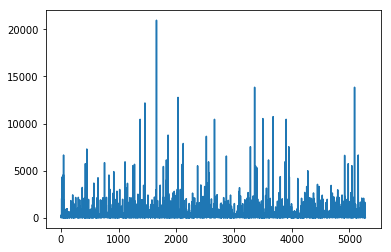

In [292]:
lengths =[]
for rev in reviews_ints:
  lengths.append(len(rev))
print(max(lengths))
%matplotlib inline
plt.plot(lengths)
plt.show()

# sum(lengths)/len(lengths)
lengths = None

In [0]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)
    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features


In [294]:
seq_length = 1400

features = pad_features(reviews_ints, seq_length=seq_length)

# ## test statements - do not change - ##
# assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
# assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features.shape)

(5279, 1400)


# Dataset split

In [295]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*0.8)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

# test_idx = int(len(remaining_x)*0.5)
# val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
# val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

val_x = remaining_x
val_y = remaining_y

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape))

features= None
train_y.shape

			Feature Shapes:
Train set: 		(4223, 1400) 
Validation set: 	(1056, 1400)


(4223,)

# dataloaders and batching

In [0]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
# test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True )
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True )
# test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True )

In [297]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 1400])
Sample input: 
 tensor([[    0,     0,     0,  ...,  1536,   594,  5466],
        [    0,     0,     0,  ...,     0,   785,    70],
        [    0,     0,     0,  ...,  1498,     0,    16],
        ...,
        [    0,     0,     0,  ...,     0, 12040,    70],
        [    0,     0,     0,  ...,    36,     0,    70],
        [    0,     0,     0,  ...,    70,    42,   711]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2,
        1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2,
        1, 2])


# Pytorch Network

In [298]:
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
  print("Training on GPU")
else:
  print('No GPU available. Training on CPU')

Training on GPU


In [0]:

import torch.nn as nn
import torch.nn.functional as F

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.LogSoftmax(dim=1)
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # print(out.shape)
        # sigmoid function
        sig_out = self.sig(out)
        # sig_out = out
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1, 3)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [300]:

# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(53133, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=256, out_features=3, bias=True)
  (sig): LogSoftmax()
)


In [0]:
# loss and optimization functions
lr=0.001

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [302]:

# training params

epochs = 25 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()
    # net.to('cuda')

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        # labels = torch.tensor(labels, dtype=torch.long)
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        # print(inputs.shape)
        # get the output from the model
        output, h = net(inputs, h)
        # print(output.shape, labels.shape)
        # calculate the loss and perform backprop
       
        loss = criterion(output.squeeze(), labels)
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.squeeze())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(val_loss))



Epoch: 1/25... Step: 100... Loss: 0.918202... Val Loss: 0.801973
Epoch: 2/25... Step: 200... Loss: 0.754148... Val Loss: 0.793168
Epoch: 3/25... Step: 300... Loss: 0.418891... Val Loss: 1.009425
Epoch: 4/25... Step: 400... Loss: 0.298579... Val Loss: 1.068025
Epoch: 5/25... Step: 500... Loss: 0.158487... Val Loss: 1.783535
Epoch: 7/25... Step: 600... Loss: 0.030991... Val Loss: 1.466086
Epoch: 8/25... Step: 700... Loss: 0.038215... Val Loss: 2.579368
Epoch: 9/25... Step: 800... Loss: 0.011723... Val Loss: 1.375808
Epoch: 10/25... Step: 900... Loss: 0.065060... Val Loss: 1.715047
Epoch: 11/25... Step: 1000... Loss: 0.170156... Val Loss: 2.133847
Epoch: 13/25... Step: 1100... Loss: 0.041771... Val Loss: 1.959725
Epoch: 14/25... Step: 1200... Loss: 0.012920... Val Loss: 1.728476
Epoch: 15/25... Step: 1300... Loss: 0.065297... Val Loss: 2.027033
Epoch: 16/25... Step: 1400... Loss: 0.063391... Val Loss: 2.946314
Epoch: 17/25... Step: 1500... Loss: 0.117685... Val Loss: 1.402247
Epoch: 19/25

## Loading and testing the model


In [0]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

# model_test = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

# model_test.load_state_dict(torch.load(root_path+'/model.pt'),strict=False)
# if train_on_gpu:
#   print("using GPU")
#   model_test.cuda()
# model_test.eval()

# for param in model_test.parameters():
#   print(param.data)

In [305]:
test_csv = pd.read_csv(root_path + 'dataset/test.csv')
test_csv.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [306]:
# parse_review(review[0],review[1].translate(table).replace('’','').replace('–','').lower(), drugs_list)

list(test_csv.text)[20], list(test_csv.drug)[20],

("You are overthinking this. Just ask her out and see if she accepts first. If she says yes, then you can discuss where you'd like to go that would suit both of you. If she wants to talk about her Crohn's, then listen to her, but I wouldn't mention it until she does to be honest. Ditto the unsympathetic ex. Dx Crohn's in June 2000. (Yay  ) Tried: 5-ASAs, azathioprine, 6MP, Remicade, methotrexate, Humira, diets. 1st surgery 20/2/13 - subtotal colectomy with end ileostomy. 2nd surgery 10/7/15 - ileorectal anastomosis. Stoma reversed and ileum connected to the rectum. Current status: Chronic flare. Do I have any other kind? Current meds: 50mg 6MP; Entyvio (started 3/11/16)",
 'remicade')

In [0]:
# def get_sentiment(review, drug):
#   drugs_list = drugs.copy()
#   test_review = parse_review(list(test_csv.text)[200], list(test_csv.drug)[200], drugs_list)
#   test_input = pad_features([test_review], 600)
#   test_input = np.array(test_input)
#   # initialize hidden state
#   h = net.init_hidden(2)
#   feature_tensor = torch.from_numpy(test_input)
    
#   # batch_size = feature_tensor.size(0)
#   if(train_on_gpu):
#     feature_tensor = feature_tensor.cuda()

#   # get the output from the model
#   output, h = net(feature_tensor, h)  
#   return torch.exp(output).topk(1)

In [0]:
import string
def tok_rev(review):
    
    words = review.lower().split(' ')
    table = str.maketrans('', '', string.punctuation)
    review = [w.translate(table).replace('’','').replace('–','') for w in words]
    # review = ''.join([c for c in review if c not in punctuation])
    tokens = []
    for word in review:
      
        try:
            token = vocab_to_int[word]
            # print(word, token)
        except KeyError:
            token = 0
            # print(word, token)
        tokens.append(token)
    return tokens

In [0]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    reviews_ints = [reviews_ints]
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)
    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [0]:
def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tok_rev(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    return torch.exp(output).topk(3).indices.to('cpu').numpy()[0][0]

In [359]:
value = predict(net, list(test_csv.text)[20])
value

2

In [0]:
file = open(root_path+'submission.csv','w')
file.write("unique_hash,sentiment\n")
a = set()
for i in zip(test_csv.unique_hash, test_csv.text, test_csv.drug):
  logits = predict(net, i[1])
  file.write("{},{}\n".format(i[0],logits))
  a.add(logits)
file.close()

In [364]:
sub = pd.read_csv(root_path+'submission.csv')
set(sub.sentiment)
a

{0, 1, 2}